[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolin_1958/timescales_comparison.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Bolin_1958/timescales_comparison.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolin_1958/timescales_comparison.ipynb)

#### Timescales comparison 






In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from PySDM.physics import si, in_unit
from PySDM import Formulae
from open_atmos_jupyter_utils import show_plot
import pandas as pd
from matplotlib import pyplot

In [3]:
any_non_zero_value = 44.0
radii = np.asarray([0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.20]) * si.cm
temperature = Formulae().constants.T0 + 10 * si.K
R_vap = 0.75
settings = {
    "terminal_velocity":"RogersYau",
    "saturation_vapour_pressure":"AugustRocheMagnus",
    "ventilation":"Froessling1938",
    "particle_shape_and_density":"LiquidSpheres",
    "air_dynamic_viscosity":"ZografosEtAl1987",
    "isotope_equilibrium_fractionation_factors":"VanHook1968",
    "isotope_diffusivity_ratios":"Stewart1975",
    "isotope_relaxation_timescale": "ZabaAndArabas2025",
}
adjustment_time = {}

In [4]:
formulae = Formulae(**settings)
const = formulae.constants

In [5]:
adjustment_time["Bolin table"] = np.asarray([3.3, 7.1, 33, 93, 165, 245, 365, 435]) * si.s


In [20]:
p = const.p_STP
D = formulae.diffusion_thermics.D(temperature, p)
K = formulae.diffusion_thermics.K(temperature, p)
lv = formulae.latent_heat_vapourisation.lv(temperature)
D_iso = formulae.isotope_diffusivity_ratios.ratio_2H(temperature) * D
m_dm_dt = formulae.isotope_relaxation_timescale.isotope_m_dm_dt(
    rho_s=const.rho_w,
    radius=radii,
    D_iso=D_iso,
    D=D,
    f_iso=1,
    f=1,
    S=1,
    R_liq=0.0003,
    alpha=formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature),
    R_vap=0,
    Fk=formulae.drop_growth.Fk(temperature, K, lv),
)
adjustment_time["new"] = formulae.isotope_relaxation_timescale.tau(m_dm_dt)

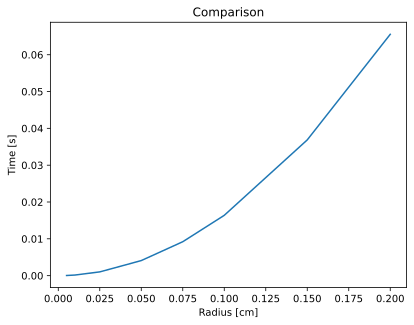

In [21]:
#pyplot.plot(in_unit(radii, si.cm), adjustment_time["Bolin table"], '.', label='Bolin table')
pyplot.plot(in_unit(radii, si.cm), adjustment_time["new"])
pyplot.gca().set(
    title='Comparison',
    xlabel='Radius [cm]',
    ylabel='Time [s]',
)
show_plot('fig')